In [10]:
import tensorflow as tf
import sionna
from tensorflow.keras.layers import Layer
import numpy as np
from sionna.channel.tr38901 import models
from sionna.utils import flatten_last_dims, expand_to_rank, matrix_inv
from sionna.ofdm import ResourceGrid, RemoveNulledSubcarriers, PilotPattern
from sionna import PI, SPEED_OF_LIGHT
from scipy.special import jv
import itertools
from abc import ABC, abstractmethod
import json
from importlib_resources import files

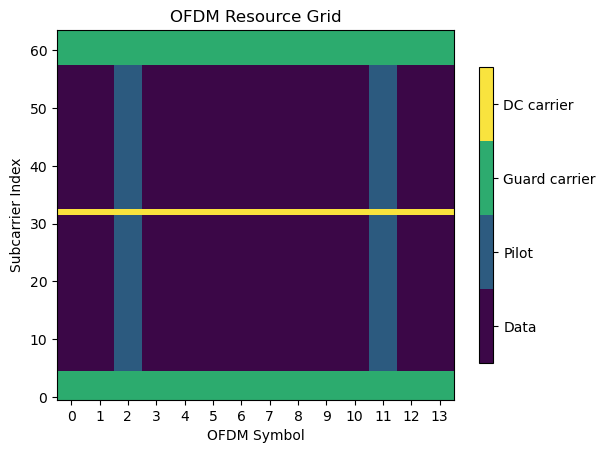

In [5]:
rg = ResourceGrid(num_ofdm_symbols = 14,
                  fft_size = 64,
                  subcarrier_spacing = 30e3,
                  num_tx = 1,
                  num_streams_per_tx = 1,
                  num_guard_carriers = [5, 6],
                  dc_null = True,
                  pilot_pattern = "kronecker",
                  pilot_ofdm_symbol_indices = [2, 11])
rg.show();

# Pilot Pattern

[<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>]

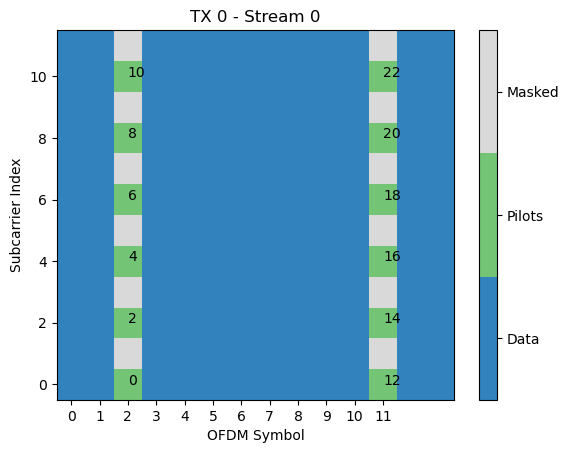

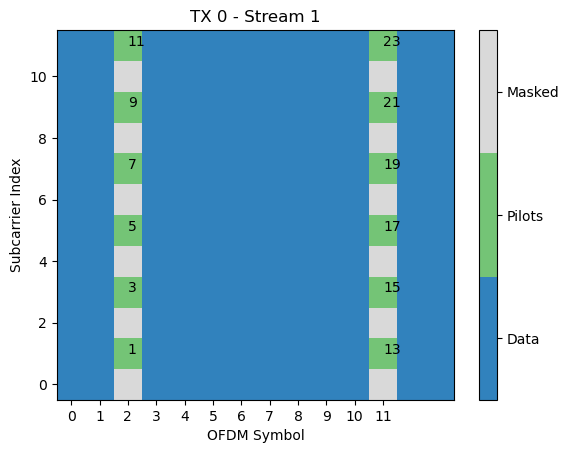

In [12]:
num_tx = 1
num_streams_per_tx = 2
num_ofdm_symbols = 14
num_effective_subcarriers = 12

# Create a pilot mask
mask = np.zeros([num_tx,
                 num_streams_per_tx,
                 num_ofdm_symbols,
                 num_effective_subcarriers])
mask[0, :, [2,11], :] = 1
num_pilot_symbols = int(np.sum(mask[0,0]))

# Define pilot sequences
pilots = np.zeros([num_tx,
                   num_streams_per_tx,
                   num_pilot_symbols], np.complex64)
pilots[0, 0, 0:num_pilot_symbols:2] = (1+1j)/np.sqrt(2)
pilots[0, 1, 1:num_pilot_symbols:2] = (1+1j)/np.sqrt(2)

# Create a PilotPattern instance
pp = PilotPattern(mask, pilots)

# Visualize non-zero elements of the pilot sequence
pp.show(show_pilot_ind=True)

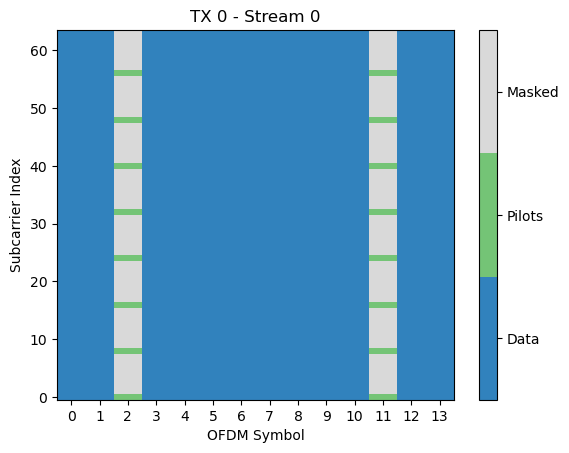

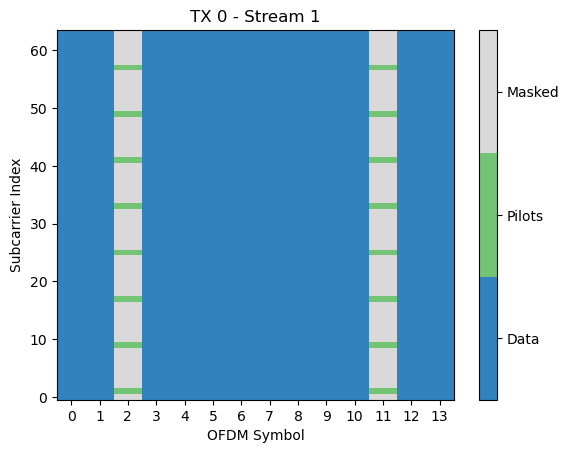

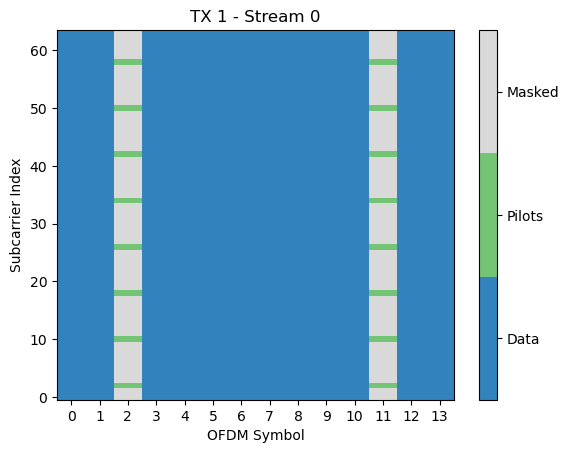

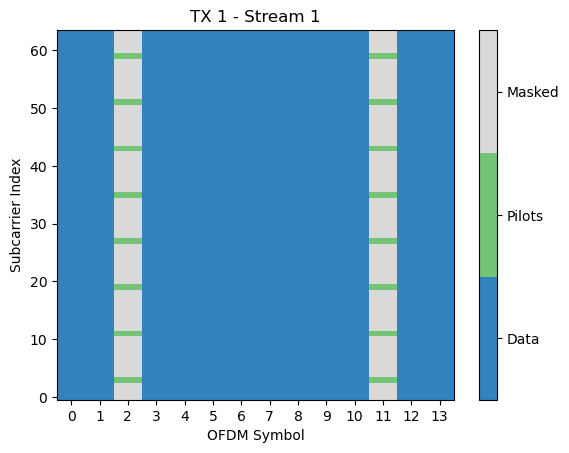

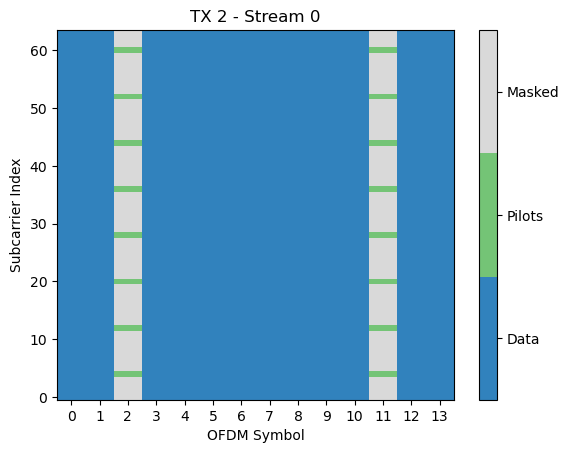

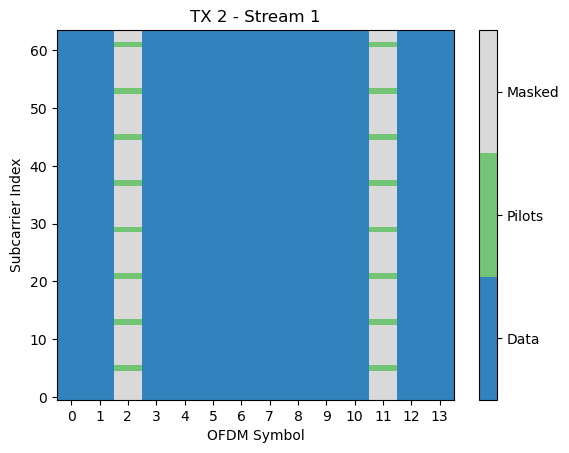

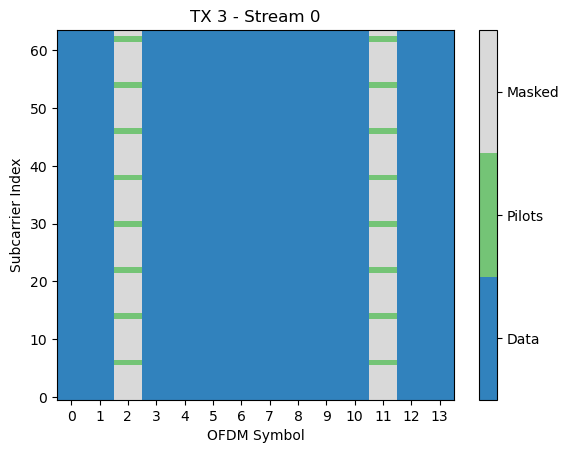

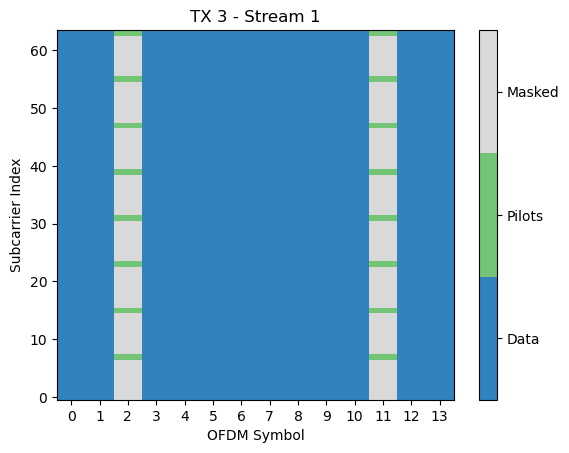

In [13]:
rg = ResourceGrid(num_ofdm_symbols=14,
                  fft_size=64,
                  subcarrier_spacing = 30e3,
                  num_tx=4,
                  num_streams_per_tx=2,
                  pilot_pattern = "kronecker",
                  pilot_ofdm_symbol_indices = [2, 11])
rg.pilot_pattern.show();